# 1. Imports

In [1]:
#Import all packages that will be used during this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from IPython.display import Image

# 2. Load Data

In [2]:
#Load the file generated from data wrangling and cleaning.
file = 'Asteroid_Clean.csv'
df = pd.read_csv(file, sep=',', index_col=0)

In [3]:
#Verify that the data loaded correctly.
df.head().T

,0,1,2,3,4
semi-major_axis(au),2.76917,2.77247,2.66915,2.36142,2.57425
eccentricity,0.076009,0.230337,0.256942,0.0887215,0.191095
x-y_inclination(deg),10.5941,34.8362,12.9889,7.14177,5.36699
longitude_asc_node,80.3055,173.08,169.853,103.811,141.577
argument_perihelion,73.5977,310.049,248.139,150.729,358.688
perihelion_dist(au),2.55868,2.13386,1.98333,2.15191,2.08232
aphelion_dist(au),2.97965,3.41107,3.35497,2.57093,3.06617
orbital_period,4.6082,4.61644,4.36081,3.62884,4.13032
data_arc(d),8822,72318,72684,24288,63507
condition_code,0,0,0,0,0


# 3. Exploring the Data

### 3.1 Exploring Asteroid Classifications

#### 3.1.1 Which variables are categorical?

In [4]:
data_type = df.dtypes
data_type[(data_type == 'object')|(data_type == 'category')].index.tolist()

['near_earth_obj', 'physically_hazardous_asteroid', 'class']

#### 3.1.2 What determines how an asteroid is classified?

A common unit in astronomy is the astronomical unit (au), and is roughly equal to the distance from the Earth to the Sun or 150 million kilometers.

Near Earth Object (NEO) : An asteroid or comet that is less than 1.3 au from the sun.

Physically Hazardous: Determined by whether it is an NEO and its size.

Class: This is the orbit class, such as if it is part of the main asteroid belt, orbits a larger planet, or is near earth.


Resources: 

NEO Basics, Jet Propulsion Lab, https://cneos.jpl.nasa.gov/about/neo_groups.html

Asteroids, NASA Science - Solar System Explorations, https://solarsystem.nasa.gov/asteroids-comets-and-meteors/asteroids/in-depth/

#### 3.1.3 The relationship between the classifiers and the target.

Since the physically hazardous classifer is based on the target, it cannot be used for modeling.

The NEO classifer is represented within the more specific classifer of orbit class, so the NEO classifer is not needed for further exploration.

In [5]:
drop_list = ['near_earth_obj', 'physically_hazardous_asteroid']
df.drop(drop_list, axis=1, inplace=True)

#### 3.1.4 Oribit Class

Let's see how diamteter is distributed by orbit class.

In [6]:
#While experimenting with different plots, there were issues with 'class' having the type 'object'.
#Changed the type to category to avoid this.
df['class'] = df['class'].astype('category')
df['class'].dtypes

CategoricalDtype(categories=['AMO', 'APO', 'AST', 'ATE', 'CEN', 'IMB', 'MBA', 'MCA',
                  'OMB', 'TJN', 'TNO'],
                 ordered=False)

In [7]:
#Set Plot Colors
sns.set_palette('inferno', 11)

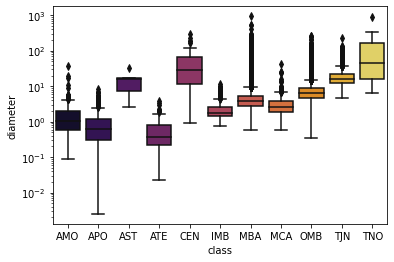

In [8]:
sns.boxplot(x='class', y='diameter', data=df)
plt.yscale('log');

There does appear to be some relationship between the diameter of an asteroid and where it orbits. Orbits are determined by strength of gravity, which is determined by the size of the two objects and how close they are to each other. So, it makes sense that larger asteroids are going to be closer to the larger planets, than to Earth. For reference, here are the basic descriptions of each type of orbit:

Reference: Object Classifications, UMA, https://pdssbn.astro.umd.edu/data_other/objclass.shtml

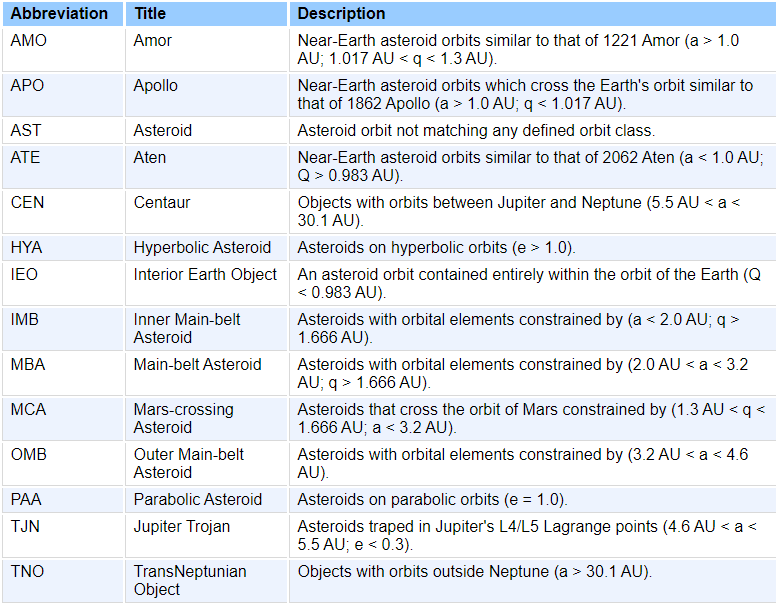

In [9]:
Image(filename = 'orbits.png', width = 500)

In [10]:
#Diamter is measured in kilometers.

#Potential sampling bias, since certain types of asteroids are easier to detect.

df['diameter'].describe()

count    137636.000000
mean          5.483228
std           9.385735
min           0.002500
25%           2.770000
50%           3.956000
75%           5.742000
max         939.400000
Name: diameter, dtype: float64

In [11]:
class_group = df.groupby('class').agg({
    'diameter':['mean','median','min','max','std','var','count']})

print(class_group)

         diameter                                                            
             mean   median     min      max         std           var   count
class                                                                        
AMO      1.766591   1.0450  0.0880   37.675    2.971932      8.832382     269
APO      0.958425   0.6025  0.0025    8.480    1.097541      1.204597     486
AST     14.283429  16.4000  2.6560   32.492   10.028549    100.571796       7
ATE      0.630716   0.3700  0.0230    3.879    0.702853      0.494002      95
CEN     52.473245  28.0000  0.8900  302.000   63.978581   4093.258785      49
IMB      2.288675   1.7460  0.7420   11.506    1.470614      2.162706     588
MBA      5.076341   3.8340  0.6000  939.400    8.277078     68.510018  126390
MCA      3.411217   2.5570  0.5870   42.870    3.512911     12.340547     355
OMB      8.783017   6.3565  0.3470  254.000   12.023403    144.562224    7510
TJN     20.771467  15.4710  4.5620  225.000   16.487683    271.8

Some observations: <br>
<br>
Mean: Highest = TNO; Lowest= ATE <br>
This is the same for median. <br>
<br>
The largest asteroid is part of TNO. The smallest is part of APO.<br>
<br>
The most observations are part of MBA. The fewest are in AST.<br>

#### 3.1.5 Condition Code

A feature that should be under categories is condition_code. It is a rank from 0-9 of uncertainty in an objects orbit.

In [12]:
print(df['condition_code'].dtypes)
print(df['condition_code'].unique())

int64
[0 1 3 2 4 5 9 7 6 8]


In [13]:
df['condition_code'] = df['condition_code'].astype('category')

There does not seem to much uncertainty in the orbit of the asteroids. If there is, it does tend to be at the highest level 

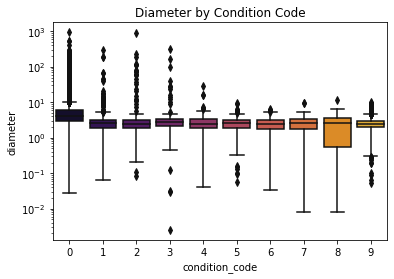

In [14]:
sns.boxplot(x='condition_code', y='diameter', data=df)
plt.title('Diameter by Condition Code')
plt.yscale('log');

It does appear that there is a relationship between condition code and diameter. Mainly, that there is more certainty in the orbital paths of larger asteroids. This brought to question whether the uncertainty was calculated from diameter or not. One part of the calculation is Gaussian gravitational constant, which is calculated from total mass of the orbiting bodies. Mass is calculated from the size of the asteroid. This means condition code can not be used in the model.

In [15]:
df.drop('condition_code', axis=1, inplace=True)

### 3.2 Exploring Asteroid Numerical Features

#### 3.2.1 Initial Look With Correlation

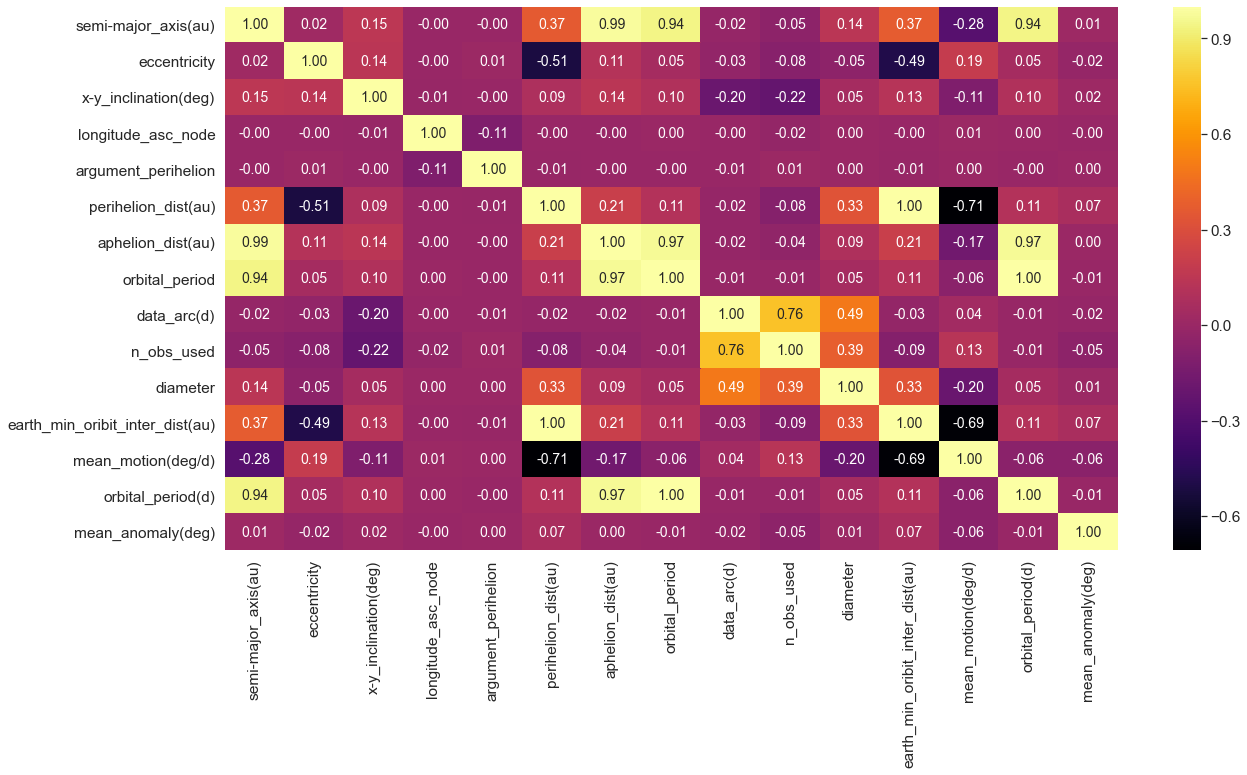

In [16]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(),annot=True, cmap='inferno', fmt='.2f', annot_kws={'size':14});

There are a few varibles that seem to be the same, so only one needs to be kept.

In [17]:
#orbital_period(d) and orbital_period
df.drop('orbital_period', axis=1, inplace=True)

In [18]:
#perihelion_distance and earth_min_orbit_inter_dist(au)
df.drop('earth_min_oribit_inter_dist(au)', axis=1, inplace=True)

What about all the strong correlations to semi-major axis? <br>
<br>
The semi-major axis is half the sum of the perihelion distance and the aphelion distance. It is also an aspect of orbit shape and size, which is why it would relate to orbital_period. All these variables will be kept for now until they are further explored.

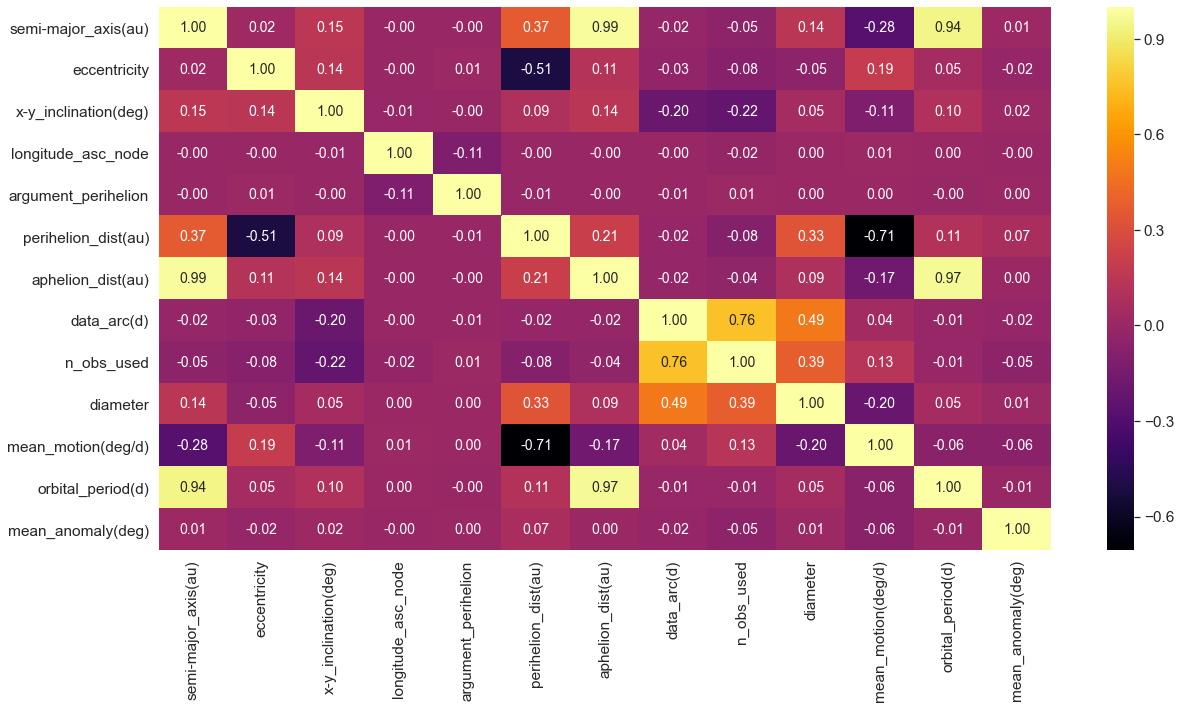

In [19]:
#Cleaning-up the heatmap.
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(),annot=True, cmap='inferno', fmt='.2f', annot_kws={'size':14});

#### 3.2.2 semi-major_axis(au)

In [20]:
plt.style.use('dark_background')

In [21]:
df['semi-major_axis(au)'].describe()

count    137636.000000
mean          2.814613
std           1.522740
min           0.626226
25%           2.536714
50%           2.750859
75%           3.092537
max         389.145964
Name: semi-major_axis(au), dtype: float64

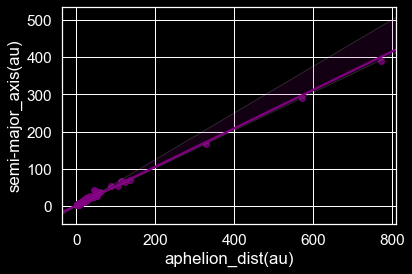

In [22]:
sns.regplot(y='semi-major_axis(au)', x='aphelion_dist(au)', data=df, color='purple');

Possible linear relationship between aphelion distance and semi-major axis.

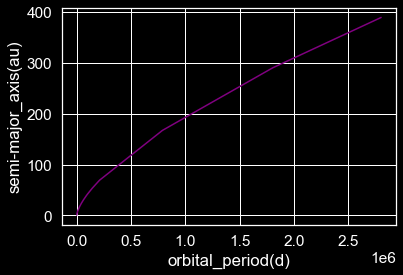

In [23]:
sns.lineplot(y='semi-major_axis(au)', x='orbital_period(d)', data=df, color='purple');

The relationship has a slight curve between orbital period and semi-major axis, so it is possible that there is a non-linear connection between the two features.

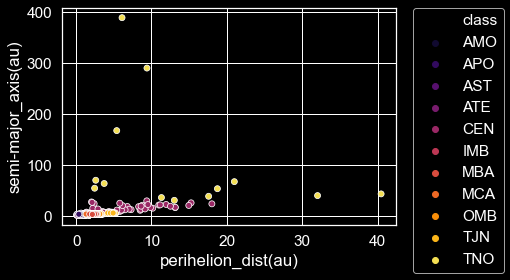

In [24]:
sns.scatterplot(y='semi-major_axis(au)', x='perihelion_dist(au)', data=df, hue='class', palette='inferno');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

There does not appear to be a direct correlation between perihelion distance and semi-major axis, but there may be some groupings by class.

#### 3.2.3 Eccentricity

In [25]:
df['eccentricity'].describe()

count    137636.000000
mean          0.145485
std           0.077573
min           0.000489
25%           0.089623
50%           0.138543
75%           0.191141
max           0.984348
Name: eccentricity, dtype: float64

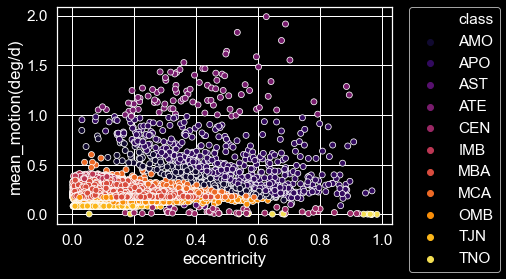

In [26]:
sns.scatterplot(x='eccentricity', y='mean_motion(deg/d)', data=df, hue='class', palette='inferno');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Again, there is not an obvious connection between eccentricity and mean motion, but there are groupings betweeen class and mean motion.

#### 3.2.4 Inclination

In [27]:
df['x-y_inclination(deg)'].describe()

count    137636.000000
mean         10.349182
std           6.835111
min           0.021855
25%           5.120506
50%           9.389963
75%          13.738588
max         170.323647
Name: x-y_inclination(deg), dtype: float64

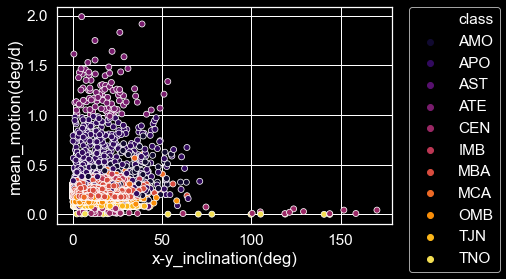

In [28]:
sns.scatterplot(x='x-y_inclination(deg)', y='mean_motion(deg/d)', data=df, hue='class', palette='inferno');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

This is another example of the relationship between mean motion and class.

#### 3.2.5 Longitude

In [29]:
df['longitude_asc_node'].describe()

count    137636.000000
mean        169.827629
std         102.713052
min           0.000738
25%          82.334880
50%         160.438430
75%         256.268387
max         359.990858
Name: longitude_asc_node, dtype: float64

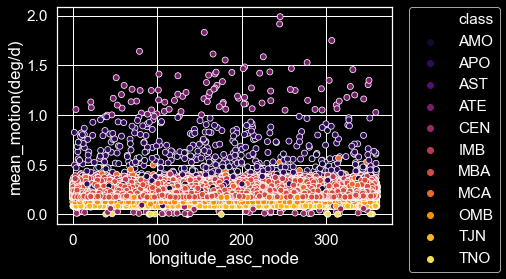

In [30]:
sns.scatterplot(x='longitude_asc_node', y='mean_motion(deg/d)', data=df, hue='class', palette='inferno');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

There is a continual pattern of mean motion being layered by class in relation to other features, lets look at the relation between the two.

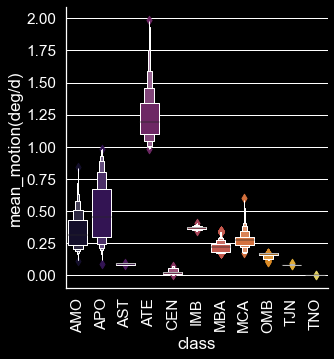

In [31]:
sns.catplot(x='class', y='mean_motion(deg/d)', data=df, kind='boxen', palette='inferno')
plt.xticks(rotation=90)
plt.show();

There do appear to be some groupings between the two features. However, there is still enough overlap between some classes that one feature cannot be used to fully describe the other. This relationship was also seen when compared with argument perihelion, data arc, and the number of observations.

#### 3.2.6 Argument Perihelion

In [32]:
df['argument_perihelion'].describe()

count    137636.000000
mean        181.904551
std         103.556464
min           0.004466
25%          91.947943
50%         183.669900
75%         271.762261
max         359.995174
Name: argument_perihelion, dtype: float64

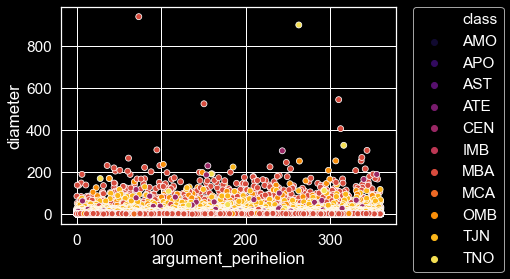

In [33]:
sns.scatterplot(x='argument_perihelion', y='diameter', data=df, hue='class', palette='inferno');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

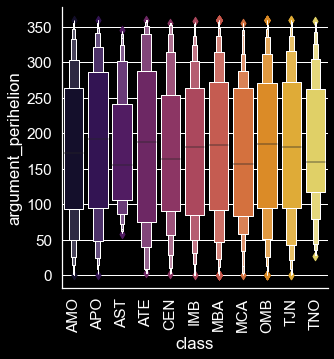

In [34]:
sns.catplot(x='class', y='argument_perihelion', data=df, kind='boxen', palette='inferno')
plt.xticks(rotation=90)
plt.show();

There does not appear to be any immediate patterns between the argument perihelion, diameter, and any of the other features.

#### 3.2.7 Perihelion Distance

In [35]:
df['perihelion_dist(au)'].describe()

count    137636.000000
mean          2.402609
std           0.516169
min           0.081882
25%           2.068948
50%           2.363897
75%           2.685811
max          40.465671
Name: perihelion_dist(au), dtype: float64

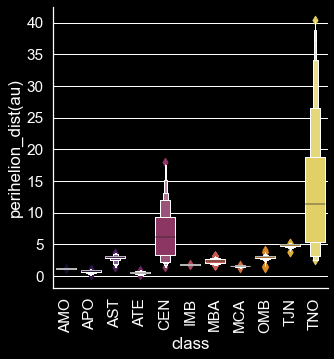

In [36]:
sns.catplot(x='class', y='perihelion_dist(au)', data=df, kind='boxen', palette='inferno')
plt.xticks(rotation=90)
plt.show();

There do seem to be some relationships between class and perhelion distance. This does make sense, since class is where it orbits and perihelion distance is how far it is from the sun. In the following plot, this is further seen with some distinct groupings between the distance and diameter. Where the size relates to where it orbits.

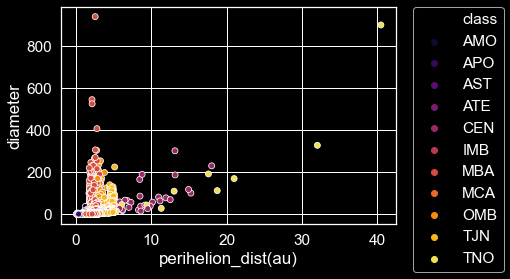

In [37]:
sns.scatterplot(x='perihelion_dist(au)', y='diameter', data=df, hue='class', palette='inferno');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### 3.2.8 Aphelion Distance

In [38]:
df['aphelion_dist(au)'].describe()

count    137636.000000
mean          3.226618
std           2.896374
min           0.999956
25%           2.864438
50%           3.167516
75%           3.468608
max         772.201080
Name: aphelion_dist(au), dtype: float64

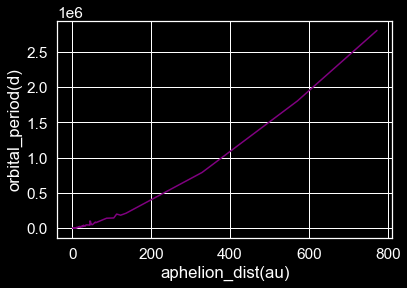

In [39]:
sns.lineplot(y='orbital_period(d)', x='aphelion_dist(au)', data=df, color='purple');

The aphelion distance is the furthest distance of the objects orbit from the sun, which explains why there would be a relationship to orbital period.

#### 3.2.9 Data Arc

In [40]:
df['data_arc(d)'].describe()

count    137636.000000
mean       8968.417086
std        6162.243453
min           1.000000
25%        6292.000000
50%        7572.000000
75%        9726.000000
max       72684.000000
Name: data_arc(d), dtype: float64

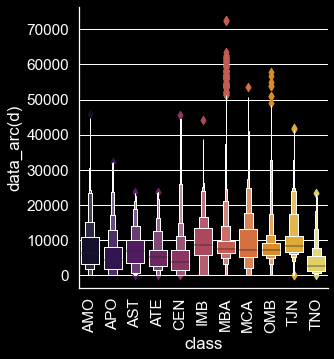

In [41]:
sns.catplot(x='class', y='data_arc(d)', data=df, kind='boxen', palette='inferno')
plt.xticks(rotation=90)
plt.show();

The data arc is the time between the earliest and latest observation of the asteoid. This can relate to class because where it orbits can determine how often it can be observed.

#### 3.2.10 Number of Observations Used

In [42]:
df['n_obs_used'].describe()

count    137636.000000
mean        675.027740
std         595.935104
min           5.000000
25%         215.000000
50%         496.000000
75%         984.000000
max        9325.000000
Name: n_obs_used, dtype: float64

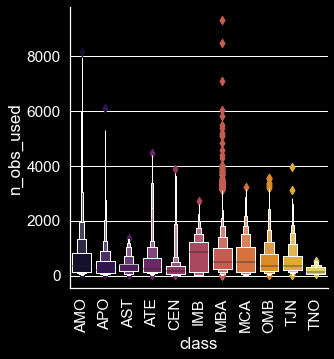

In [43]:
sns.catplot(x='class', y='n_obs_used', data=df, kind='boxen', palette='inferno')
plt.xticks(rotation=90)
plt.show();

There are more obseravations of the asteroids near earth and in the main asteroid belt, oribits that are easier to observe than some of the further orbits. 

#### 3.2.11 Mean Motion

In [44]:
df['mean_motion(deg/d)'].describe()

count    137636.000000
mean          0.219640
std           0.056980
min           0.000128
25%           0.181231
50%           0.216024
75%           0.243948
max           1.988877
Name: mean_motion(deg/d), dtype: float64

As previously explored, mean motion, when grouped by class, as realtion with many of the other features.

#### 3.2.12 Orbital Period

In [45]:
df['orbital_period(d)'].describe()

count    1.376360e+05
mean     1.783972e+03
std      9.325769e+03
min      1.810067e+02
25%      1.475726e+03
50%      1.666483e+03
75%      1.986419e+03
max      2.803930e+06
Name: orbital_period(d), dtype: float64

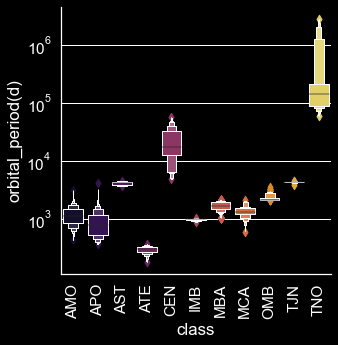

In [46]:
sns.catplot(x='class', y='orbital_period(d)', data=df, kind='boxen', palette='inferno')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show();

Orbital period does group well by class since orbits that are further away from the sun will have a longer orbital period.

#### 3.2.13 Mean Anomoly

In [47]:
df['mean_anomaly(deg)'].describe()

count    137636.000000
mean        183.116785
std         103.411497
min           0.000517
25%          94.301261
50%         186.826667
75%         271.468299
max         359.999979
Name: mean_anomaly(deg), dtype: float64

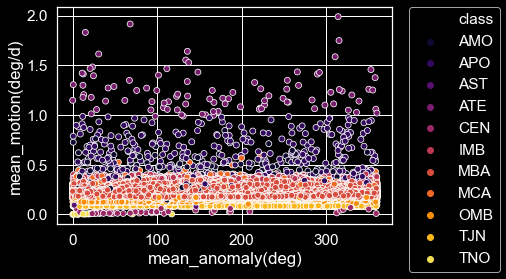

In [48]:
sns.scatterplot(x='mean_anomaly(deg)', y='mean_motion(deg/d)', data=df, hue='class', palette='inferno');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The mean anomoly is the product of an orbiting body's mean motion and time past perihelion passage.

# 4. Save Data

In [49]:
new_file = 'Asteroid_EDA_Clean.csv'
df.to_csv(new_file)